<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLparadigmas/Slide2.PNG" width=800, align="center">

 

<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLparadigmas/Slide1.PNG" width=800, align="center">

<img src="https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/ClassificationRegressionBreastCancer.png?raw=true" width=900, align="center">




<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/SUPERVISIONADO_E_REFORCO.png" width=800, align="center">



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide4.PNG" width=800, align="center">





<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide5.PNG" width=800, align="center">

In [71]:
Estimador_preco_imovel = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
Estimador_preco_imovel.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


# Exploração inicial dos dados 

In [72]:
df.describe()

,areaM2,suites,dormitorios,banheiros,vagas,preco
count,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3.741000e+03
mean,140.343758,1.700882,2.946271,3.095429,2.225341,1.553746e+06
std,60.051791,0.994945,0.759292,1.372859,1.000940,1.073607e+06
min,20.000000,1.000000,1.000000,1.000000,1.000000,2.800000e+05
25%,94.000000,1.000000,3.000000,2.000000,1.000000,8.500000e+05
50%,130.000000,1.000000,3.000000,3.000000,2.000000,1.200000e+06
75%,180.000000,2.000000,3.000000,4.000000,3.000000,1.880000e+06
max,299.000000,6.000000,6.000000,9.000000,5.000000,8.000000e+06


In [73]:
df.isnull().sum()

bairro         0
areaM2         0
suites         0
dormitorios    0
banheiros      0
vagas          0
preco          0
dtype: int64

## Aprendizado de Maquina

## Regressão Linear


Entendido como funcionam os modelos em geral podemos agora nos concentrar unicamente em como criar e avaliar modelos de Regressão Linear. 

Um modelo linear aproxima o valor de variável objetivo $Y$ a partir de uma combinação linear das variáveis preditoras $X$. 

$$ \widehat y = a_0 + a_{1} x_1 + a_{2} x_2 + ... + a_{n} x_n $$
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat y$ para $X=0$ (*intercept*). Se temos uma única variável preditora $x_1$ nosso modelo é uma reta e temos um modelo de **Regressão Simples**. Se temos mais dimensões temos um *hiperplano* e o modelo é uma **Regressão Múltipla**.  

Existem também outros modelos de Regressão. Por exemplo, um modelo de Regressão Polinomial busca aproximar os dados a um polinômio de grau $n$ e $ \widehat y = a_0 + a_{1} x_1^1 + a_{2} x_1^2 + ... + a_{n} x_1^n $ seria um modelo de Regressão Polinomial Simples de grau 2. Esses são modelos de **regressão não linear**, mas nos deteremos aqui unicamente em modelos lineares.






Os quatro conjuntos de dados acima foram obtidos aplicando-se as funções: 

$ (I) \space \space  \space \space y = 2x + 3 + \epsilon , \text{onde} \space  \epsilon = \text{noise} $ 

$ (II) \space \space  \space \space y = 2x^2 + 3   $

$ (III) \space \space  \space \space y  =  x^3 - 2x  $

$ (IV) \space \space  \space \space y  = x cos(x) + x   $

Embora apenas o conjunto de dados $I$ se ajuste de fato a um modelo linear você pode notar que podemos calcular o modelo linear em todos os casos, *mesmo ele não se ajustando aos dados*!

No caso de uma regressão simples você pode observar o ajuste ou não do modelo fazendo uma inspeção visual como acima. Mas o mesmo pode ocorrer no caso de uma regressão múltipla e, neste caso, havendo mais dimensões você não poderá observar o ajuste dos dados ao modelo. Por isso é necessário termos uma métrica, uma medida que avalia a **eficiência do modelo**, ou o quanto os dados se ajustam ao nosso modelo proposto. A métrica mais importante para uma regressão linear é o **Coeficiente de Determinação**, $R^2$ ou ainda $R-Square$.

O **Coeficiente de Determinação** é uma medida no intervalo $[0,1]$ que indica o quanto um modelo linear explica a variância de um conjunto de dados. Quanto mais próximo de $1$ o valor do $R^2$, mais os dados se ajustam ao  modelo linear. 

$$ R^2 = 1 - \frac{E_{res}}{E_{total}} $$


onde 

$$E_{res} = \sum (y_i - \widehat y_i )^2 $$  

é a *soma dos quadrados residuais* e,

$$E_{total} = \sum (y_i - \bar y )^2 $$ 


é a *soma total dos quadrados*.




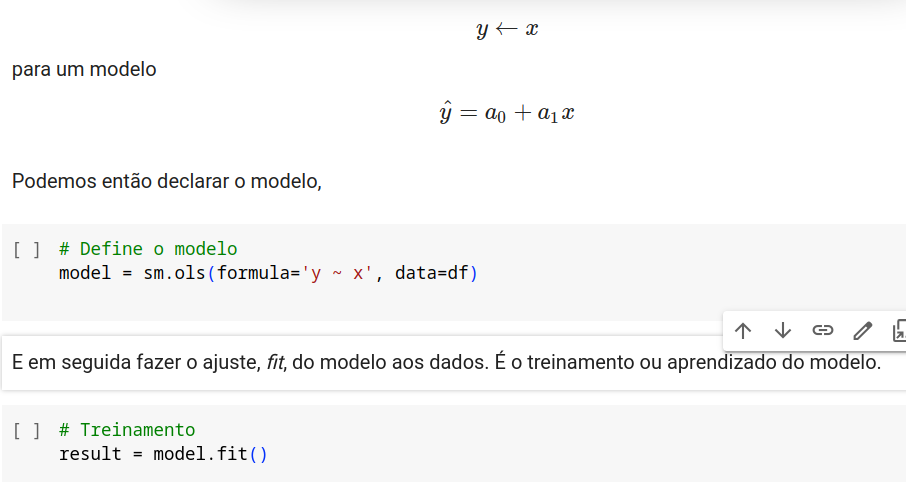

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


def Celsius2Fahrenheit(Celsius):
  return Celsius * 9/5 + 32

df = pd.DataFrame()
df['celsius'] = np.arange(-20,60)
df['fahrenheit'] = Celsius2Fahrenheit( df['celsius'] )
df.head()


,celsius,fahrenheit
0,-20,-4.0
1,-19,-2.2
2,-18,-0.4
3,-17,1.4
4,-16,3.2


In [75]:
from sklearn.linear_model import LinearRegression

X = df[['celsius']] 
y = df['fahrenheit']

regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression()

In [76]:
Fahrenheit_prediction = regressor.predict(pd.DataFrame({'celsius':[0,27]}))
print(Fahrenheit_prediction)

print("Coefficients: \n", regressor.coef_, regressor.intercept_)

[32.  80.6]
Coefficients: 
 [1.8] 32.0


_____

In [77]:
from sklearn.linear_model import LinearRegression

X = df[['fahrenheit']]
y = df['celsius'] 

regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression()

In [78]:
Celsius_prediction = regressor.predict(pd.DataFrame({'fahrenheit':[32,80.6]}))
print(Celsius_prediction)

[ 0. 27.]


### Regressão 1

In [79]:
np.random.seed(1)
df = pd.DataFrame()

df['temperature'] = np.arange(0,45,1)
df['chirps'] = (20 * df['temperature'] - 4) / 16 
df['chirps'] = df['chirps'] + np.round(np.random.sample(len(df))*5,0)

<>:5: SyntaxWarning: invalid escape sequence '\^'
<>:5: SyntaxWarning: invalid escape sequence '\^'
/tmp/ipykernel_641612/3197917863.py:5: SyntaxWarning: invalid escape sequence '\^'
  plt.ylabel('temperatura $\^{o}C$')


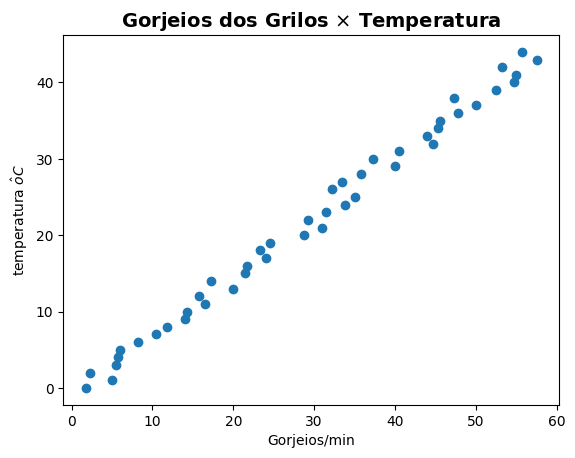

In [80]:
plt.scatter(df['chirps'],df['temperature'])

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\^'
<>:5: SyntaxWarning: invalid escape sequence '\^'
/tmp/ipykernel_641612/940567505.py:5: SyntaxWarning: invalid escape sequence '\^'
  plt.ylabel('temperatura $\^{o}C$')


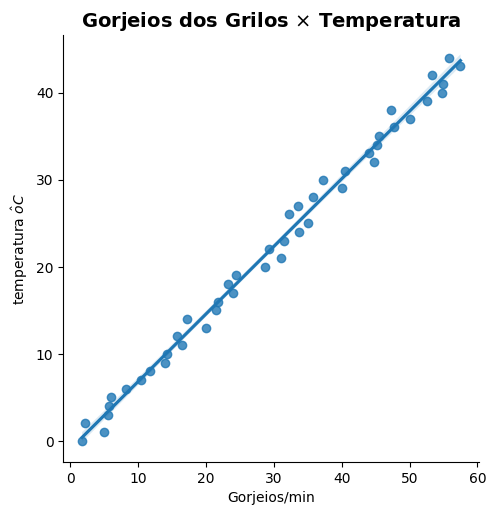

In [81]:
sns.lmplot(x='chirps',y='temperature', data=df)

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

## OLS Regression Results -> statsmodels

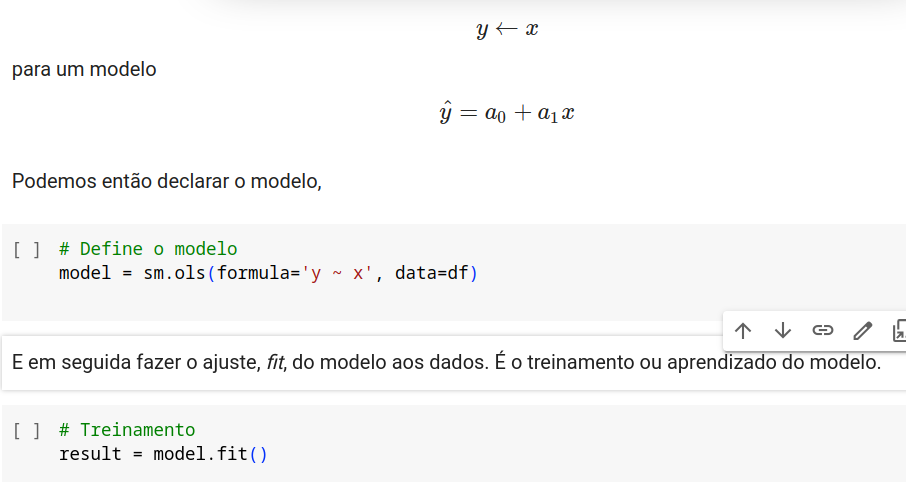

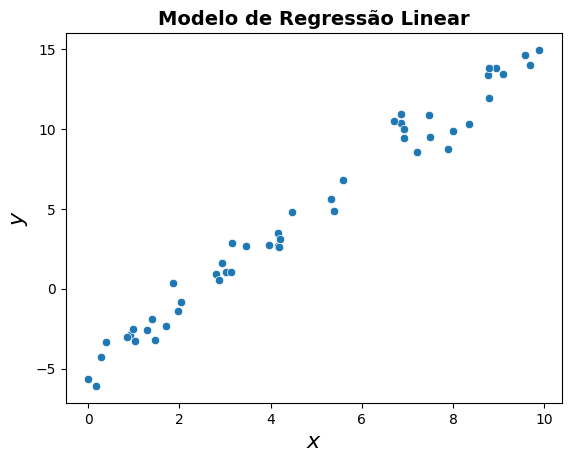

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           5.71e-42
Time:                        22:37:45   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

In [126]:
import statsmodels.formula.api as sm
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x=x, y=y)

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()


df = pd.DataFrame({'x':x,'y':y})
df.head()

# Define o modelo
model = sm.ols(formula='y ~ x', data=df)
# Treinamento
result = model.fit()
print(result.summary())

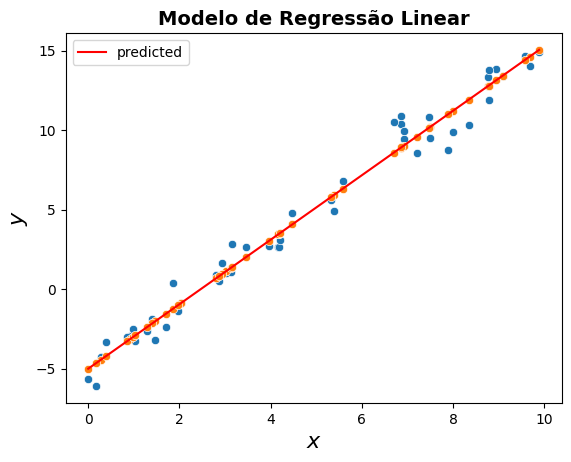

In [127]:
df['predicted'] = result.predict(df.x)
sns.scatterplot(x='x',y='y',data=df)
sns.scatterplot(x='x',y='predicted',data=df)
sns.lineplot(x='x',y='predicted',data=df,color='red', label='predicted')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)

plt.legend()
plt.show()


 Analisando a Eficiência do Modelo

O Sumário acima ainda traz o Coeficiente de Determinação e os *p-values* dos coeficientes. O primeiro você já conhece e é uma medida geral da eficiência do modelo.

$$ R^2 = 0.979 $$

Esse é um valor bastante próximo de 1 e que garante termos um modelo que explica bastante bem os dados.

Outra medida importante de se observar são os $p-values$ dos coeficientes. Eles são um teste de hipótese sobre os valores dos coeficientes onde a hipótese nula é de que os coeficientes são não significativos ($= 0$). A hipótese alternativa é de que o coeficiente é significativo (e, portanto $\ne 0$). Assim, $ p-values < 0.05 $ indicarão que o coeficiente é significativo para o modelo e podemos observar que para os dois coeficientes acima (`Intercept` e `x`) os valores são significativos.

$$ p-value(a_i) < 0.05 \Rightarrow a_i \space \text{é Significativo} $$

Podemos assim, dizer que

$$ \hat y = -4.9986 + 2.0272 x $$ 

é um modelo que aproxima bastante bem os dados.

Existem várias outras métricas nos resultados acima, mas para os nossos propósitos a análise acima já é suficiente.

> **$R^2$ qual é um bom valor? Novamente não existe um modelo 'certo' e a questão é melhor formulada em termos de: qual é um bom resultado para os seus propósitos? Mas de modo geral valores $R^2 > 0.8$ já são bastante úteis mesmo para predições e com valores abaixo $R^2 < 0.6$ recomendaríamos buscar outros modelos de aproximação dos dados.**


In [82]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='temperature ~ chirps', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5334.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           9.94e-47
Time:                        19:57:14   Log-Likelihood:                -70.585
No. Observations:                  45   AIC:                             145.2
Df Residuals:                      43   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9595      0.361     -2.659      0.0

In [83]:
modelo = sm.ols(formula='preco ~ areaM2  + suites + dormitorios + banheiros + vagas', data=Estimador_preco_imovel)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:14   Log-Likelihood:                -55098.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3735   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1713.8448   4.06e+04      0.042      

In [84]:
# GABARITO
modelo2 = sm.ols(formula='preco ~ areaM2  + suites + dormitorios + vagas -1', data=Estimador_preco_imovel) # -1 tira o intercept
modelo2 = modelo2.fit()
print(modelo2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        19:57:15   Log-Likelihood:                         -55099.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3737   BIC:                                  1.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [86]:
# GABARITO
modelo3 = sm.ols(formula='preco ~ areaM2  + bairro + suites + dormitorios + banheiros + vagas', data=Estimador_preco_imovel)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1611.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:45   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3731   BIC:                         1.087e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [119]:
# Cria o modelo com todas as variáveis preditoras, incluindo 'bairro'
model_all = sm.ols(formula="preco ~ areaM2 + suites + dormitorios + vagas + bairro", data=df)
result_all = model_all.fit()
print(result_all.summary())

# Cria um DataFrame para a previsão, incluindo o bairro 'vila-mariana'
x_new = pd.DataFrame({'areaM2': [134], 'suites': [1], 'dormitorios': [4], 'vagas': [2], 'bairro': ['vila-mariana']})

# Faz a previsão
predicted_price_all = result_all.predict(x_new)
print("Predicted price (all predictors):", predicted_price_all[0])

# - O statsmodels automaticamente converte a variável categórica 'bairro' em variáveis dummy (indicadoras).
# - Cada bairro, exceto um (que serve como referência), terá sua própria variável dummy no modelo.
# - Os coeficientes para as variáveis dummy representam o efeito de cada bairro no preço em relação ao bairro de referência.

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1812.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:08:59   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3732   BIC:                         1.087e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### OBS - parametros do OLS

In [87]:

# lm.params
# lm.params[0]
# lm.params.Intercept

In [88]:

Gorjeios_Observados = 32
Temperatura_Estimada = lm.params.Intercept +lm.params.chirps * Gorjeios_Observados 
print(f'{Temperatura_Estimada:.2f} oC')
Gorjeios_Observados = 32
Temperatura_Estimada = -0.9595 + 0.7761 * Gorjeios_Observados 
print(f'{Temperatura_Estimada:.2f} oC')

23.88 oC
23.88 oC


In [89]:
lm.pvalues # teste de hipotese

Intercept    1.095724e-02
chirps       9.939203e-47
dtype: float64

###### OBS!!! 
Não podemos afirmar que o atributo que influencia mais o preço em termos absolutos é o valor com o maior coeficiente sendo preciso normalizar os dados

Já que a coluna com valores mais altos é terá coeficientes melhores que os demais

(ex: os cm² do app terá um coeff menos significativo que o m²

### Tratando os parametros

In [90]:
parametros = pd.DataFrame()


In [91]:
parametros["parametros"] = lm.params
type(parametros)

pandas.core.frame.DataFrame

In [92]:
parametros

,parametros
Intercept,-0.959528
chirps,0.776097


In [93]:

parametros = pd.DataFrame()
parametros["parametros"] = lm.pvalues
parametros["ABS"] = parametros.abs()
parametros = parametros.sort_values(by="ABS", ascending=False)
parametros


,parametros,ABS
Intercept,1.095724e-02,1.095724e-02
chirps,9.939203e-47,9.939203e-47


In [94]:

parametros = pd.DataFrame()
parametros["parametros"] = modelo.pvalues
parametros["ABS"] = parametros.abs()
parametros = parametros.sort_values(by="ABS", ascending=False)
parametros["SIGNIFICATIVO"] = parametros["ABS"] < 0.05
parametros


,parametros,ABS,SIGNIFICATIVO
Intercept,9.662901e-01,9.662901e-01,False
banheiros,1.048334e-01,1.048334e-01,False
suites,8.361773e-38,8.361773e-38,True
dormitorios,6.172685e-64,6.172685e-64,True
vagas,1.082706e-74,1.082706e-74,True
areaM2,6.816549e-270,6.816549e-270,True


In [95]:
pd.DataFrame(modelo.summary().tables[1].data[1::], columns=modelo.summary().tables[1].data[0]).set_index('')

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1713.8448,4.06e+04,0.042,0.966,-7.78e+04,8.12e+04
areaM2,1.05e+04,274.850,38.206,0.000,9962.080,1.1e+04
suites,2.128e+05,1.64e+04,12.996,0.000,1.81e+05,2.45e+05
dormitorios,-3.046e+05,1.77e+04,-17.210,0.000,-3.39e+05,-2.7e+05
banheiros,-1.681e+04,1.04e+04,-1.622,0.105,-3.71e+04,3507.003
vagas,2.992e+05,1.6e+04,18.704,0.000,2.68e+05,3.31e+05


In [96]:
pd.DataFrame(modelo.pvalues).sort_values(by=0)

,0
areaM2,6.816549e-270
vagas,1.082706e-74
dormitorios,6.172685e-64
suites,8.361773e-38
banheiros,1.048334e-01
Intercept,9.662901e-01


#### ANALISE DO Pvalues

In [97]:
parametros["SIGNIFICATIVO"] = parametros["ABS"] < 0.05
parametros

,parametros,ABS,SIGNIFICATIVO
Intercept,9.662901e-01,9.662901e-01,False
banheiros,1.048334e-01,1.048334e-01,False
suites,8.361773e-38,8.361773e-38,True
dormitorios,6.172685e-64,6.172685e-64,True
vagas,1.082706e-74,1.082706e-74,True
areaM2,6.816549e-270,6.816549e-270,True


### Predição

In [98]:
# preco ~ areaM2  + suites + dormitorios + vagas
x = pd.DataFrame({'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'vagas': [2]})
preco_estimado = modelo2.predict(x)[0]

print(f'Preço estimado (US$ 1000): {preco_estimado:.2f}')

Preço estimado (US$ 1000): 949268.27


## Tratamento de dados

### % pelo valor máximo

Lembre de converter o resultado e os parametros para essa nova medida

In [99]:
normalizado = Estimador_preco_imovel.copy()

In [100]:
valoresMax=normalizado.max()
valoresMax

bairro         vila-sonia
areaM2                299
suites                  6
dormitorios             6
banheiros               9
vagas                   5
preco             8000000
dtype: object

In [101]:
for coluna in normalizado.columns:
  if coluna != 'bairro' :
    print(coluna)
    normalizado[coluna] = normalizado[coluna] / normalizado[coluna].max()
#
normalizado.head()

areaM2
suites
dormitorios
banheiros
vagas
preco


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,0.107023,0.166667,0.166667,0.111111,0.2,0.061250
1,vila-nova-conceicao,0.525084,0.333333,0.333333,0.222222,0.4,0.397500
2,vila-nova-conceicao,0.685619,0.333333,0.500000,0.333333,0.6,0.237500
3,vila-nova-conceicao,0.645485,0.500000,0.500000,0.333333,0.6,0.445625
4,vila-nova-conceicao,0.387960,0.166667,0.500000,0.222222,0.4,0.200625


In [102]:

# Verifique que os mesmos resultados podem ser obtidos normalizando apenas as variáveis preditoras. preditoras - > apenas os parametros não o preço
for coluna in normalizado.columns:
  if coluna != 'preco' and coluna != 'bairro' :
    print(coluna)
    normalizado[coluna] = normalizado[coluna] / normalizado[coluna].max()
#
normalizado.head()

areaM2
suites
dormitorios
banheiros
vagas


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,0.107023,0.166667,0.166667,0.111111,0.2,0.061250
1,vila-nova-conceicao,0.525084,0.333333,0.333333,0.222222,0.4,0.397500
2,vila-nova-conceicao,0.685619,0.333333,0.500000,0.333333,0.6,0.237500
3,vila-nova-conceicao,0.645485,0.500000,0.500000,0.333333,0.6,0.445625
4,vila-nova-conceicao,0.387960,0.166667,0.500000,0.222222,0.4,0.200625


In [112]:
# seu código
normalizado = Estimador_preco_imovel.copy()

normalizado['areaM2'] = normalizado['areaM2']/(normalizado['areaM2'].max())
normalizado['suites'] = normalizado['suites']/(normalizado['suites'].max())
normalizado['dormitorios'] = normalizado['dormitorios']/(normalizado['dormitorios'].max())
normalizado['banheiros'] = normalizado['banheiros']/(normalizado['banheiros'].max())
normalizado['vagas'] = normalizado['vagas']/(normalizado['vagas'].max())
normalizado['preco'] = normalizado['preco']/(normalizado['preco'].max())

x = pd.DataFrame({'areaM2': [134/(df['areaM2'].max())], 'suites': [1/(df['suites'].max())], 'dormitorios': [4/(df['dormitorios'].max())], 'vagas': [2/(df['vagas'].max())]})

model = sm.ols(formula="preco ~ areaM2 + suites + dormitorios + vagas - 1", data=normalizado)
result = model.fit()
print(result.summary())

result.predict(x) * df['preco'].max()

# 949268.265645

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        20:01:42   Log-Likelihood:                          4363.9
No. Observations:                3741   AIC:                                     -8720.
Df Residuals:                    3737   BIC:                                     -8695.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

0    949268.265645
dtype: float64

a área é o atributo que mais influencia no modelo

### MinMAx

In [103]:
normalizado = Estimador_preco_imovel.copy()

In [104]:
maximosEminimos = pd.DataFrame()
maximosEminimos["max"] = normalizado.max()
maximosEminimos["min"] = normalizado.min()
maximosEminimos

,max,min
bairro,vila-sonia,morumbi
areaM2,299,20
suites,6,1
dormitorios,6,1
banheiros,9,1
vagas,5,1
preco,8000000,280000


O retorno da regressão logistica é uma porcentagem --> ela é um separador linear

Regressãp logistica sempre faz uma reta

In [105]:

for coluna in normalizado.columns:
  if coluna != 'preco' and coluna != 'bairro' :
    print(coluna)
    normalizado[coluna] = (normalizado[coluna] - normalizado[coluna].min()) / (normalizado[coluna].max()-normalizado[coluna].min())
#
normalizado.head()

areaM2
suites
dormitorios
banheiros
vagas


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,0.043011,0.0,0.0,0.000,0.00,490000
1,vila-nova-conceicao,0.491039,0.2,0.2,0.125,0.25,3180000
2,vila-nova-conceicao,0.663082,0.2,0.4,0.250,0.50,1900000
3,vila-nova-conceicao,0.620072,0.4,0.4,0.250,0.50,3565000
4,vila-nova-conceicao,0.344086,0.0,0.4,0.125,0.25,1605000


In [106]:
df = Estimador_preco_imovel

In [107]:
df_scaled = df.drop(columns=["bairro"]) / df.max()

# df_scaled = df.drop(columns=['preco']) / df.drop(columns=['preco']).max()
# df_scaled['preco'] = df['preco']

df_scaled.head()

,areaM2,bairro,banheiros,dormitorios,preco,suites,vagas
0,0.107023,NaN,0.111111,0.166667,0.06125,0.166667,0.2
1,0.525084,NaN,0.222222,0.333333,0.3975,0.333333,0.4
2,0.685619,NaN,0.333333,0.5,0.2375,0.333333,0.6
3,0.645485,NaN,0.333333,0.5,0.445625,0.5,0.6
4,0.38796,NaN,0.222222,0.5,0.200625,0.166667,0.4


## Analises dos Dados

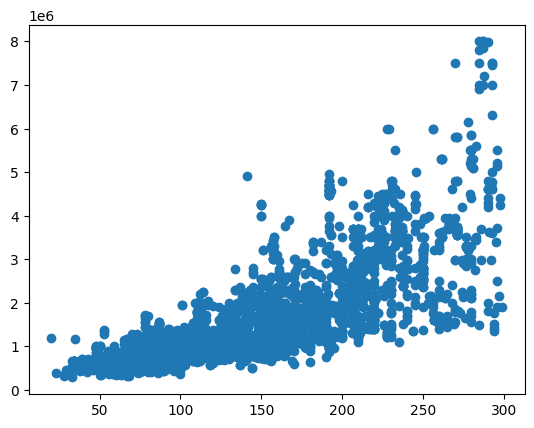

In [108]:
plt.scatter(df.areaM2, df.preco)
plt.show()

# Os dados possuem homocedasticidade --> os dados vão se distanciando conforme aumenta o valor de x

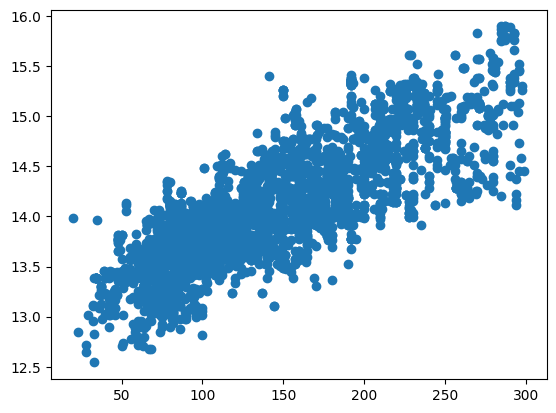

In [109]:
plt.scatter(df.areaM2, y =np.log(df.preco))
plt.show()

# Log é uma maneira de evitar isso

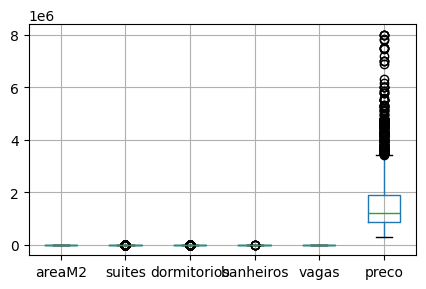

In [113]:
plt.figure(figsize=(5,3))

df.boxplot(figsize=(10,6))
plt.show()

### SCIKIT-Learn

In [110]:
from sklearn import linear_model
df_case = pd.DataFrame({'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'vagas': [2]})
x = df.drop(columns=["preco","banheiros","bairro"])
y = df.preco
reg = linear_model.LinearRegression(fit_intercept = False)
reg.fit(x, y)

y_pred = reg.predict(df_case)
print(f'Preço estimado (US$ 1000): {y_pred[0]:.2f}')

Preço estimado (US$ 1000): 949268.27


In [111]:

print("Os valores são diferentes pois o statsmodels utiliza o método dos mínimos quadrados ordinários (OLS) para estimar os coeficientes do modelo, enquanto o scikit-learn utiliza outros métodos de otimização que podem levar a resultados ligeiramente diferentes.")


Os valores são diferentes pois o statsmodels utiliza o método dos mínimos quadrados ordinários (OLS) para estimar os coeficientes do modelo, enquanto o scikit-learn utiliza outros métodos de otimização que podem levar a resultados ligeiramente diferentes.


In [117]:
#IA COPILOT
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

df_4pred = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(df_4pred)

model = LinearRegression()
model.fit(scaled_x, y)

x_new = np.array([[134, 1, 4, 2]])
x_new_scaled = scaler.transform(x_new)
predicted_price = model.predict(x_new_scaled)

print("Predicted price (scikit-learn):", predicted_price[0])

print("Predicted price (statsmodels):", (result.predict(x) * (df['preco'].max() - df['preco'].min()) + df['preco'].min()).values[0])

# Os preços previstos dos modelos scikit-learn e stats podem diferir ligeiramente devido às diferentes formas de lidar com o termo de interceptação.
# Statsmodels exclui explicitamente a interceptação na fórmula ("- 1"), enquanto o scikit-learn a inclui por padrão.
# Isso pode levar a pequenas variações nos coeficientes calculados e nas previsões.

Predicted price (scikit-learn): 950278.0028634971
Predicted price (statsmodels): 1196043.8763477209


/home/anahelena/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [118]:
#Código do professor
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

x_new = pd.DataFrame({'areaM2': [134], 'suites': [1], 'dormitorios': [4], 'vagas': [2]})

regressor = linear_model.LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(x_new)
print("Predicted price (scikit-learn):", y_pred[0])

Predicted price (scikit-learn): 950278.0028634968


# simulando dados

In [120]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_samples=120, class_sep=0.85, weights=[0.7,0.3],
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2
)

df = pd.DataFrame()
df['income'] = ( X[:,0] + 3 ) * 10000
df['balance'] = X[:,1] * 1000
df['default'] = y
df['default'] = df['default'].astype('bool')

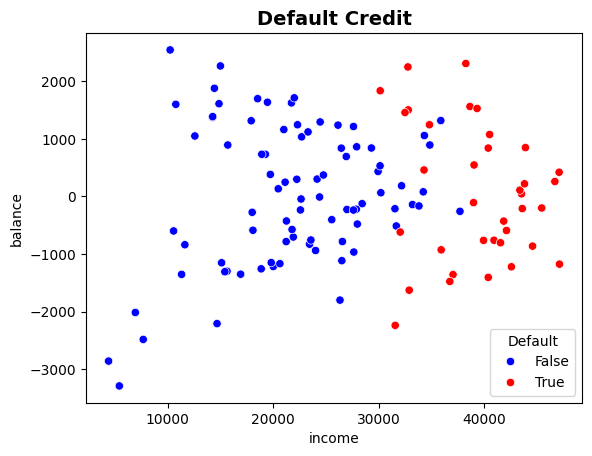

In [121]:
sns.scatterplot(x='income',y='balance',hue='default',data=df,palette=['blue','red'])
plt.title('Default Credit', fontsize=14, weight='bold')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend(title='Default',loc='lower right')
plt.show()

plt.show()

In [122]:
from sklearn.neighbors import KNeighborsClassifier

# Define as entradas e saídas do modelo
X = df[['income','balance']]
y = df['default']

# Define o modelo a ser empregado 
clf = KNeighborsClassifier(n_neighbors=3)

# Treina o modelo
clf.fit(X, y)



KNeighborsClassifier(n_neighbors=3)

In [123]:
novo_credito = pd.DataFrame({'income':[31500], 'balance':[1000]})

clf.predict(novo_credito)

array([False])

___

In [136]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df = df.drop(columns='bairro')
df = np.log(df)
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,3.465736,0.000000,0.000000,0.000000,0.000000,13.102161
1,5.056246,0.693147,0.693147,0.693147,0.693147,14.972392
2,5.323010,0.693147,1.098612,1.098612,1.098612,14.457364
3,5.262690,1.098612,1.098612,1.098612,1.098612,15.086675
4,4.753590,0.000000,1.098612,0.693147,0.693147,14.288634


In [137]:
X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
# model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

# calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
# print()

# Predição
y_pred = model.predict(np.log(df_case))
print(f'Preço estimado (scikit-learn): {np.exp(y_pred[0]):.2f}')


Coeficientes:  {'areaM2': np.float64(3.2946860200052823), 'suites': np.float64(-0.46343682756966564), 'dormitorios': np.float64(-1.5903518226562143), 'vagas': np.float64(-0.16344293354886352)}
Intercept:  0.0
Score (R2):  -0.592856602827865

Preço estimado (scikit-learn): 1003353.60


# classificadores

In [124]:
# you can skip this code!

# Adaptado de Introduction to Machine Learning with Python by Andreas C. Müller, Sarah Guido
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

KNeighborsClassifier()
SVC()
DecisionTreeClassifier()


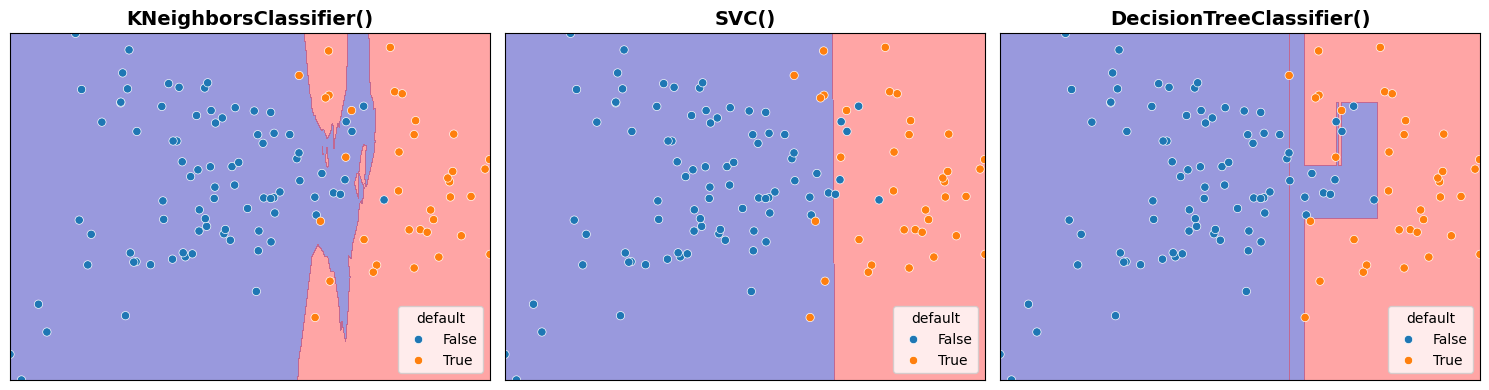

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X = np.array(df[['income','balance']])
y = df['default']

models = [KNeighborsClassifier(n_neighbors=5),
          SVC(),
          DecisionTreeClassifier()]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for model, ax in zip(models, axes):
    print(model)
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, ax=ax)
    ax.set_title(model, fontsize=14, weight='bold')
    ax.set_xlabel('income')
    ax.set_ylabel('balance')

plt.tight_layout()
plt.show()


# Metrica


Veja [A Comprehensive Overview of Regression Evaluation Metrics](https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/) e [Metrics and scoring: quantifying the quality of predictions](
https://scikit-learn.org/stable/modules/model_evaluation.html)

In [128]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)


In [129]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df = df.drop(columns='bairro')
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


In [130]:
df_case = pd.DataFrame({'areaM2':[134], 'suites':[1], 'dormitorios':[4], 'vagas':[2]})
df_case


,areaM2,suites,dormitorios,vagas
0,134,1,4,2


In [131]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas', data=df)
# lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df)
lm = lm.fit()
print(lm.summary())
print()

calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
print()

preco = lm.predict(df_case)
print()
print(f'Preço estimado: {preco[0]:.2f}')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2027.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:03:38   Log-Likelihood:                -55099.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3736   BIC:                         1.102e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3407.3121   4.04e+04     -0.084      

In [132]:

calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
print()


MSE: 363479068155.80
RMSE: 602892.25
MAPE: 27.16
MAE: 398507.18
sMAPE: 24.81
MAD: 773278.64



In [133]:
X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

# model = LinearRegression(fit_intercept=False) # set fit_intercept to False
model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
print()

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  {'areaM2': np.float64(10468.461739070792), 'suites': np.float64(202771.70454037527), 'dormitorios': np.float64(-311340.86561812006), 'vagas': np.float64(296751.59991048346)}
Intercept:  -3407.312060851371
Score (R2):  0.6845689083685004

MSE: 363479068155.80
RMSE: 602892.25
MAPE: 27.16
MAE: 398507.18
sMAPE: 24.81
MAD: 773278.64

Preço estimado (scikit-learn): 950278.00


In [134]:
df = pd.DataFrame()
df['X'] = np.arange(0,100)
df['y'] = 2*df['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='y ~ X', data=df).fit()
print(lm.summary())
print()

print(np.round(lm.predict()))



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.429e+06
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.79e-224
Time:                        23:07:46   Log-Likelihood:                -24.328
No. Observations:                 100   AIC:                             52.66
Df Residuals:                      98   BIC:                             57.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4978      0.062     24.202      0.0

In [135]:
df = pd.DataFrame()
df['X'] = np.arange(0,100)
df['y'] = 2*df['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='np.log1p(y) ~ np.log1p(X)', data=df).fit()
print(lm.summary())
print()

print(np.round(np.exp(lm.predict())))
print(np.round(np.exp(lm.predict(df['X'])).values))


                            OLS Regression Results                            
Dep. Variable:            np.log1p(y)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.363e+05
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          4.58e-175
Time:                        23:07:55   Log-Likelihood:                 274.88
No. Observations:                 100   AIC:                            -545.8
Df Residuals:                      98   BIC:                            -540.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7681      0.006    120.805      

# DICIONÁRIO


Verifique que os mesmos resultados podem ser obtidos normalizando apenas as variáveis preditoras.

preditoras - > apenas os parametros da regressão linear e não o valor de y

MAPE --> percentual

MSE ---> cuidado com numeros grandes e pequenos
(min square error --> skitlearn minimiza essa variavel)
